<a href="https://colab.research.google.com/github/Daarwinmendez/Fine-Tuning-LLMs/blob/main/main_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade jupyter ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 118.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Atte

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install datasets
!pip install scikit-learn
!pip install transformers
!pip install tensorflow
!pip install keras
!pip install sentencepiece
!pip install openpyxl
!pip install evaluate
!pip install torch
!pip install rouge_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename

### Importamos las dependencias Necesarias

In [ ]:
# Manejo de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

# Conjuntos de datos y evaluaciones
from datasets import load_dataset, Dataset # Para cargar datasets directamente
from evaluate import load  # Para métricas de evaluación

# Machine Learning
import sklearn  # Importa sklearn completo para usar sus submódulos
from sklearn.metrics import accuracy_score, confusion_matrix

# Deep Learning
import tensorflow as tf
from tensorflow import keras  # Keras integrado con TensorFlow
import torch  # Para PyTorch y manejo de CUDA
import sentencepiece  # Procesamiento de tokenización

# Modelos de lenguaje
import transformers as tr
from transformers import pipeline, AutoTokenizer

# Manejo de archivos
import openpyxl  # Para trabajar con archivos Excel

# Configuración adicional
import os  # Operaciones del sistema
import warnings  # Control de advertencias
import time  # Para mediciones de tiempo


In [ ]:
# Verificación de entorno CUDA (opcional)
if torch.cuda.is_available():
    print(f"CUDA está disponible. GPU detectada: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA no está disponible. Usando CPU.")

CUDA está disponible. GPU detectada: NVIDIA A100-SXM4-40GB


#### Definimos el Benchmark que a lo largo de el notebook Iremos Llenando.

In [ ]:
# Crear un DataFrame con MultiIndex en las columnas
df = pd.DataFrame(
    index=pd.MultiIndex.from_product(
        [("Summarization", "Classification"),
         ("Foundation", "Foundation ZSL", "Foundation FSL", "Fine-Tuned", "Hugginface's M1", "Hugginface's M2")],
        names=["Task", "Model Type"]
    ),
    columns= ["Metric", "Inference Time", "Size in (GB)", "Qty of Parameters", "Qualitative Insight"],
)
df

Metric Inference Time Size in (GB)  \
Task           Model Type                                           
Summarization  Foundation         NaN            NaN          NaN   
               Foundation ZSL     NaN            NaN          NaN   
               Foundation FSL     NaN            NaN          NaN   
               Fine-Tuned         NaN            NaN          NaN   
               Hugginface's M1    NaN            NaN          NaN   
               Hugginface's M2    NaN            NaN          NaN   
Classification Foundation         NaN            NaN          NaN   
               Foundation ZSL     NaN            NaN          NaN   
               Foundation FSL     NaN            NaN          NaN   
               Fine-Tuned         NaN            NaN          NaN   
               Hugginface's M1    NaN            NaN          NaN   
               Hugginface's M2    NaN            NaN          NaN   

                               Qty of Parameters Qualitative Insight  
Task           Model Type                                             
Summarization  Foundation                    NaN                 NaN  
               Foundation ZSL                NaN                 NaN  
               Foundation FSL                NaN                 NaN  
               Fine-Tuned                    NaN                 NaN  
               Hugginface's M1               NaN                 NaN  
               Hugginface's M2               NaN                 NaN  
Classification Foundation                    NaN                 NaN  
               Foundation ZSL                NaN                 NaN  
               Foundation FSL                NaN                 NaN  
               Fine-Tuned                    NaN                 NaN  
               Hugginface's M1               NaN                 NaN  
               Hugginface's M2               NaN                 NaN

In [ ]:
def get_size_gb(downloaded_model) -> float:
    """
    Toma un modelo de HuggingFace y devuelve su tamaño en GB.
    """
    model = downloaded_model.model
    total_size_bytes = sum(p.numel() * p.element_size() for p in model.parameters())

    total_size_gb = total_size_bytes / (1024 ** 3)  # Conversión de bytes a GB, según la formula

    return round(total_size_gb, 4)

In [ ]:
def get_n_parameters(downloaded_model) -> int:
    """
    Toma un modelo de HuggingFace y devuelve la cantidad de parámetros.
    """
    model = downloaded_model.model
    return sum(p.numel() for p in model.parameters())


In [ ]:
def get_inference_time(modelo, dataset, n_samples) -> float:
    """
    Calcula el tiempo de inferencia de un modelo HuggingFace sobre un subconjunto de datos.

    Args:
        modelo: Un modelo preentrenado de HuggingFace (e.g., modelo de transformers).
            Este modelo debe estar cargado y listo para realizar inferencias.
        dataset: Un conjunto de datos que contiene ejemplos para inferencia.
            Puede ser una lista, un DataFrame o cualquier formato compatible con el modelo.
        n_samples: Entero que indica la cantidad de muestras del dataset a utilizar
            para la inferencia. El tamaño debe ser menor o igual a la longitud del dataset.

    Returns:
        float: El tiempo total en segundos que tomó el modelo para realizar la inferencia
        sobre las `n_samples` del dataset.

    Example:
        modelo = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased")
        tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
        dataset = ["This is a great movie!", "I didn't like the book."]
        n_samples = 2

        tiempo = inference_time(modelo, dataset, n_samples)
        print(f"Tiempo de inferencia: {tiempo} segundos")
    """

    start_time = time.time()  # Registra el tiempo de inicio
    modelo(dataset[:n_samples])  # Realiza la inferencia
    end_time = time.time()  # Registra el tiempo final
    inference_time = end_time - start_time  # Calcula el tiempo de inferencia


    return round(inference_time, 4) # Retorna int inference_time

In [ ]:
def get_conf_matrix(truth, predictions, model_name) -> None:
    """
    Calcula y visualiza la matriz de confusión para evaluar el desempeño de un modelo de clasificación.

    Parámetros:
    -----------
    truth : list or array-like
        Lista o arreglo que contiene las etiquetas verdaderas (ground truth) de los datos.
        Los valores esperados son "true" y "fake".

    predictions : list or array-like
        Lista o arreglo que contiene las etiquetas predichas por el modelo.
        Los valores esperados son "true" y "fake".

    model_name : str
        Nombre del modelo cuyo desempeño se está evaluando.
        Este nombre se mostrará en el título del gráfico.

    Retorno:
    --------
    None
        La función no retorna un valor, pero muestra un gráfico de la matriz de confusión.

    Notas:
    ------
    - La función asume que las etiquetas posibles son "true" y "fake".
    - La matriz de confusión mostrará el número de aciertos y errores de las predicciones del modelo.
    - El gráfico utiliza un mapa de calor (heatmap) para facilitar la interpretación visual.

    Ejemplo:
    --------
    >>> truth = ["true", "fake", "true", "true", "fake"]
    >>> predictions = ["true", "fake", "fake", "true", "true"]
    >>> get_conf_matrix(truth, predictions, model_name="Example Model")

    Esto mostrará una matriz de confusión con los valores de predicciones correctas e incorrectas
    para las etiquetas "true" y "fake".
    """
    plt.style.use("ggplot")

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(truth, predictions, labels=["true", "fake"])

    # Visualizar la matriz de confusión
    fig, ax = plt.subplots(figsize=(6, 4))

    ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["true","fake"],  yticklabels=["true",  "fake"])

    ax.set(
        xlabel="Predicted Labels",
        ylabel="True Labels",
        title=f"Confusion Matrix for {model_name}"
    )

    plt.show()


In [ ]:
n = 5

In [ ]:
cache_dir="cache_fine_tuning"

## Legal Documents (Summarization)

Taken from : https://huggingface.co/datasets/lighteval/legal_summarization

In [ ]:
from evaluate import load
rouge = load("rouge")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
legal = "lighteval/legal_summarization"

In [ ]:
legal_dataset = load_dataset(legal, "BillSum", cache_dir=cache_dir)

legal_summarization.py:   0%|          | 0.00/1.89k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/81.1M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/13.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/18949 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3269 [00:00<?, ? examples/s]

In [ ]:
legal_train = legal_dataset["train"].to_pandas()
legal_test = legal_dataset["test"].to_pandas()

In [ ]:
legal_train

,article,summary
0,SECTION 1. LIABILITY OF BUSINESS ENTITIES PROV...,Shields a business entity from civil liability...
1,SECTION 1. SHORT TITLE. This Act may be cited ...,Human Rights Information Act - Requires certai...
2,SECTION 1. SHORT TITLE. This Act may be cited ...,Jackie Robinson Commemorative Coin Act - Direc...
3,SECTION 1. NONRECOGNITION OF GAIN WHERE ROLLOV...,Amends the Internal Revenue Code to provide (t...
4,SECTION 1. SHORT TITLE. This Act may be cited ...,Native American Energy Act - (Sec. 3) Amends t...
...,...,...
18944,SECTION 1. SHORT TITLE. This Act may be cited ...,District of Columbia Economic Recovery Act - A...
18945,SECTION 1. RECONSULTATION ON CENTRAL VALLEY PR...,Requires the Commissioner of the Bureau of Rec...
18946,SECTION 1. CHARITABLE DEDUCTION FOR CONTRIBUTI...,Amends the Internal Revenue Code to set forth ...
18947,SECTION 1. SPECIAL RULE FOR CERTAIN FACILITIES...,"This bill amends the Internal Revenue Code, wi..."


In [ ]:
legal_test

,article,summary
0,SECTION 1. ENVIRONMENTAL INFRASTRUCTURE. (a) J...,Amends the Water Resources Development Act of ...
1,That this Act may be cited as the ``Federal Fo...,Federal Forage Fee Act of 1993 - Subjects graz...
2,SECTION 1. SHORT TITLE. This Act may be cited ...,. Merchant Marine of World War II Congressiona...
3,SECTION 1. SHORT TITLE. This Act may be cited ...,Small Business Modernization Act of 2004 - Ame...
4,SECTION 1. SHORT TITLE. This Act may be cited ...,Fair Access to Investment Research Act of 2016...
...,...,...
3264,SECTION 1. PLACEMENT PROGRAMS FOR FEDERAL EMPL...,Public Servant Priority Placement Act of 1995 ...
3265,SECTION 1. SHORT TITLE. This Act may be cited ...,Sportsmanship in Hunting Act of 2008 - Amends ...
3266,SECTION 1. SHORT TITLE. This Act may be cited ...,Helping College Students Cross the Finish Line...
3267,SECTION 1. SHORT TITLE. This Act may be cited ...,Makes proceeds from such conveyances available...


In [ ]:
print(legal_train["article"][0])

SECTION 1. LIABILITY OF BUSINESS ENTITIES PROVIDING USE OF FACILITIES TO NONPROFIT ORGANIZATIONS. (a) Definitions.--In this section: (1) Business entity.--The term ``business entity'' means a firm, corporation, association, partnership, consortium, joint venture, or other form of enterprise. (2) Facility.--The term ``facility'' means any real property, including any building, improvement, or appurtenance. (3) Gross negligence.--The term ``gross negligence'' means voluntary and conscious conduct by a person with knowledge (at the time of the conduct) that the conduct is likely to be harmful to the health or well-being of another person. (4) Intentional misconduct.--The term ``intentional misconduct'' means conduct by a person with knowledge (at the time of the conduct) that the conduct is harmful to the health or well-being of another person. (5) Nonprofit organization.--The term ``nonprofit organization'' means-- (A) any organization described in section 501(c)(3) of the Internal Reven

In [ ]:
t5 = "google/t5-small-lm-adapt"

#### Foundation

In [ ]:
foundation_summa = pipeline(
    task="summarization",
    model=t5,
    min_length=50,
    max_length=100,
    truncation=True,
    model_kwargs={"cache_dir": cache_dir}
)

df.loc[("Summarization", "Foundation"), "Size in (GB)"]  = get_size_gb(foundation_summa)
df.loc[("Summarization", "Foundation"), "Qty of Parameters"] = get_n_parameters(foundation_summa)
df.loc[("Summarization", "Foundation"), "Inference Time"] = get_inference_time(foundation_summa, legal_test["article"][:n].to_list(), n)

config.json:   0%|          | 0.00/652 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.11k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
inference_found_summa = [text["summary_text"] for text in  foundation_summa(legal_test["article"][:n].to_list())]

In [ ]:
inference_found_summa

[") is amended-- (1) in paragraph (e), by striking $20,000,000'' and inserting $20,000,000''; and (2) in paragraph (34)-- (B) by striking $20,000,000'' and inserting $20,000,000''; and (C) by striking $20,000,000'' and inserting $20,000,000''. SEC. 3. UPPER MISSISSIPPI ",
 'lands Act (33 U.S.C. 1251 1387), as amended. (10) Federal Land Policy and Management Act (33 U.S.C. 1251 1387), as amended. (10) Federal Land Policy and Management Act (33 U.S.C. 1251 1387), as amended. (10) Federal Land Policy and Management Act (33 U.S.C. 1251 1387), as amended. (10) Federal Land Policy and Management Act (',
 "own respect and a desire to be a part of the Allied forces''. (10) The United States Merchant Marine was a vital asset in the Allied forces''. (10) The United States Merchant Marine was a vital asset in the Allied forces''. (10) The United States Merchant Marine was a vital asset in the Allied forces''. (10) The United States Merchant Marine was a vital asset in the Allied forces",
 '(iii) 

In [ ]:
avg_rouge_foundation = round(np.mean([value for key, value in rouge.compute(predictions=inference_found_summa, references=legal_test["summary"][:n].to_list()).items()]), 4)

In [ ]:
df.loc[("Summarization", "Foundation"), "Metric"] = f"Avg Rouge: {avg_rouge_foundation}"

#### Foundation ZSL

In [ ]:
foundation_summa_zsl = pipeline(
    task="text2text-generation",
    model=t5,
    min_length=50,
    max_length=100,
    truncation=True,
    model_kwargs={"cache_dir": cache_dir},
    generation_kwargs={
        "max_length": 100,  # Longitud moderada
        "min_length": 50,   # Evitar respuestas demasiado cortas
    }
)


df.loc[("Summarization", "Foundation ZSL"), "Size in (GB)"]  = get_size_gb(foundation_summa_zsl)
df.loc[("Summarization", "Foundation ZSL"), "Qty of Parameters"] = get_n_parameters(foundation_summa_zsl)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
summaries_zsl = []

start_time = time.time() # Tomar el tiempo de inicio
for article in legal_test["article"][:n].to_list():
  prompt = f"Summarize the following text: {article}"

  summary = foundation_summa_zsl(prompt)[0]["generated_text"]
  summaries_zsl.append(summary.replace('"', "'"))
end_time = time.time() # Tomar el tiempo final

inference_time_szl = round(end_time - start_time, 4) # Calcular el tiempo de inferencia

df.loc[("Summarization", "Foundation ZSL"), "Inference Time"] = inference_time_szl

In [ ]:
len(summaries_zsl)

5

In [ ]:
avg_rouge_foundation_zsl = round(np.mean([value for key, value in rouge.compute(predictions=summaries_zsl, references=legal_test["summary"][:n].to_list()).items()]), 4)

In [ ]:
avg_rouge_foundation_zsl

0.1073

In [ ]:
df.loc[("Summarization", "Foundation ZSL"), "Metric"] = f"Avg Rouge: {avg_rouge_foundation_zsl}"

#### Foundation FSL

In [ ]:
foundation_summa_fsl = pipeline(
    task="text2text-generation",
    model=t5,
    min_length=50,
    max_length=100,
    truncation=True,
    model_kwargs={"cache_dir": cache_dir},
    generation_kwargs={
        "max_length": 100,  # Longitud moderada
        "min_length": 50,   # Evitar respuestas demasiado cortas
    }
)


df.loc[("Summarization", "Foundation FSL"), "Size in (GB)"]  = get_size_gb(foundation_summa_fsl)
df.loc[("Summarization", "Foundation FSL"), "Qty of Parameters"] = get_n_parameters(foundation_summa_fsl)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
summaries_fsl = []

start_time = time.time() # Tomar el tiempo de inicio

# Supongamos que tenemos los artículos y resúmenes iniciales
articles_1_3 = legal_test["article"][:3].to_list()
shots_1_3 = legal_test["summary"][:3].to_list()

# Crear el prompt inicial con los primeros tres ejemplos
prompt = f"""For each article, summarize and create a riddle
from the summary:
[Article 1]: "{articles_1_3[0]}"
[Summary Riddle 1]: "{shots_1_3[0]}"
###
[Article 2]: "{articles_1_3[1]}"
[Summary Riddle 2]: "{shots_1_3[1]}"
###
[Article 3]: "{articles_1_3[2]}"
[Summary Riddle 3]: "{shots_1_3[2]}"
###
"""

# Inicializar una lista para almacenar los resultados
results = []

# Procesar los artículos del índice 4 al 10
for i in range(0, n):
    # Construir el prompt extendido para el artículo actual
    prompt += f"""
[Article {i+1}]: "{legal_test['article'][i]}"
[Summary Riddle {i+1}]:"""

    # Llamar al modelo para generar el resumen/riddle
    result = foundation_summa_fsl(prompt)  # Reemplaza foundation_summa_zsl con tu función de modelo
    results.append({
        "article": legal_test["article"][i],
        "riddle": result[0]["generated_text"].replace('"', "'")  # Ajusta según el formato del output del modelo
    })

end_time = time.time() # Tomar el tiempo final

inference_time_fsl = round(end_time - start_time, 4) # Calcular el tiempo de inferencia

In [ ]:
for result in results:
    summaries_fsl.append(result["riddle"].replace('"', "'")) # Reemplazando cualquier comilla doble.

df.loc[("Summarization", "Foundation FSL"), "Inference Time"] = inference_time_fsl

In [ ]:
avg_rouge_foundation_fzl = round(np.mean([value for key, value in rouge.compute(predictions=summaries_fsl, references=legal_test["summary"][:n].to_list()).items()]), 4)

In [ ]:
df.loc[("Summarization", "Foundation FSL"), "Metric"] = f"Avg Rouge: {avg_rouge_foundation_fzl}"

####  Fine-tuned

In [ ]:
# Promedio longitud input
mean_article = np.mean([len(article) for article in legal_train["article"]])

# Promedio longitud output
mean_summary = np.mean([len(summary) for summary in legal_train["summary"]])

print(f"Promedio longitud input: {mean_article}")
print(f"Promedio longitud output: {mean_summary}")

Promedio longitud input: 8410.039263285662
Promedio longitud output: 1182.3950604253523


In [ ]:
maximo_input = np.max([len(article) for article in legal_train["article"]])
maximo_output = np.max([len(summary) for summary in legal_train["summary"]])

print(f"Máximo longitud input: {maximo_input}")
print(f"Máximo longitud output: {maximo_output}")

Máximo longitud input: 19106
Máximo longitud output: 4965


In [ ]:
minimo_input = np.min([len(article) for article in legal_train["article"]])
minimo_output = np.min([len(summary) for summary in legal_train["summary"]])

print(f"Mínimo longitud input: {minimo_input}")
print(f"Mínimo longitud output: {minimo_output}")

Mínimo longitud input: 1208
Mínimo longitud output: 52


In [ ]:
# Agregar prefijo "summarize:" al artículo
def add_prefix(row):
    row["article"] = "summarize: " + row["article"]
    return row

# Aplicar la función fila por fila
legal_train_with_prefix = legal_train.apply(add_prefix, axis=1)


In [ ]:
legal_train_with_prefix.head()

,article,summary
0,summarize: SECTION 1. LIABILITY OF BUSINESS EN...,Shields a business entity from civil liability...
1,summarize: SECTION 1. SHORT TITLE. This Act ma...,Human Rights Information Act - Requires certai...
2,summarize: SECTION 1. SHORT TITLE. This Act ma...,Jackie Robinson Commemorative Coin Act - Direc...
3,summarize: SECTION 1. NONRECOGNITION OF GAIN W...,Amends the Internal Revenue Code to provide (t...
4,summarize: SECTION 1. SHORT TITLE. This Act ma...,Native American Energy Act - (Sec. 3) Amends t...


In [ ]:
tokenizer = AutoTokenizer.from_pretrained(t5)


def preprocess_function(examples):
    inputs = tokenizer(examples["article"], max_length=2048, truncation=True, padding="max_length")
    outputs = tokenizer(examples["summary"], max_length=512, truncation=True, padding="max_length")
    inputs["labels"] = outputs["input_ids"]

    return inputs

# tokenizar el dataset
legal_train_tokenized = Dataset.from_pandas(legal_train_with_prefix).map(preprocess_function, batched=True)


tokenizer_config.json:   0%|          | 0.00/2.11k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

Map:   0%|          | 0/18949 [00:00<?, ? examples/s]

In [ ]:
# Agregar el prefijo al test split.
legal_test_with_prefix = legal_test.apply(add_prefix, axis=1)

# Tokenizar el test_split
legal_test_tokenized = Dataset.from_pandas(legal_test_with_prefix).map(preprocess_function, batched=True)

Map:   0%|          | 0/3269 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSeq2SeqLM, TrainingArguments, Trainer

# Cargar el modelo T5 pre entrenado
model = AutoModelForSeq2SeqLM.from_pretrained(t5)

# Configurar los argumentos del entrenamiento
training_args = TrainingArguments(
    output_dir="./results",          # Carpeta para guardar resultados
    evaluation_strategy="epoch",    # Evaluar al final de cada epoch
    learning_rate=3e-5,             # Tasa de aprendizaje
    per_device_train_batch_size=8,  # Tamaño del batch de entrenamiento
    per_device_eval_batch_size=8,   # Tamaño del batch de validación
    num_train_epochs=3,             # Número de épocas
    weight_decay=0.01,              # Decaimiento del peso
    save_steps=10_000,              # Guardar cada ciertos pasos
    save_total_limit=2,             # Máximo de checkpoints
    logging_dir='./logs',           # Carpeta de logs
    logging_steps=500,              # Log cada 500 pasos
)

#  Configurar el trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=legal_train_tokenized,
    tokenizer=tokenizer,
    eval_dataset=legal_test_tokenized
)


config.json:   0%|          | 0.00/652 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-43-abd20d336985>:22: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
# Entrenar el modelo
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss
1,0.758300,0.643816
2,0.715900,0.622083
3,0.709000,0.616792


TrainOutput(global_step=7107, training_loss=0.9838948709410891, metrics={'train_runtime': 4682.6964, 'train_samples_per_second': 12.14, 'train_steps_per_second': 1.518, 'total_flos': 4.226927008363315e+16, 'train_loss': 0.9838948709410891, 'epoch': 3.0})

In [ ]:
# Guardar el modelo y el tokenizador
model.save_pretrained("./t5-legal-summarization")
tokenizer.save_pretrained("./t5-legal-summarization")

('./t5-legal-summarization/tokenizer_config.json',
 './t5-legal-summarization/special_tokens_map.json',
 './t5-legal-summarization/spiece.model',
 './t5-legal-summarization/added_tokens.json',
 './t5-legal-summarization/tokenizer.json')

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# Cargar el modelo y el tokenizador entrenados
model = AutoModelForSeq2SeqLM.from_pretrained("./t5-legal-summarization").to('cuda')  # Asegúrate de usar la GPU si es posible
tokenizer = AutoTokenizer.from_pretrained("./t5-legal-summarization")


In [ ]:
start_time  = time.time()

# Asegurarse de que el modelo esté en la GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Crear una lista para almacenar los resúmenes generados
generated_summaries = []

# Iterar sobre las primeras 500 entradas del dataset
for i in range(min(500, len(legal_test))):  # Asegurarse de no superar el tamaño del dataset
    # Tokenizar el artículo del dataset
    inputs = tokenizer("summarize: " + legal_test["article"][i], return_tensors="pt", max_length=512, truncation=True, padding="max_length").to(device)

    # Generar resumen
    outputs = model.generate(**inputs)

    # Decodificar el resumen generado y agregarlo a la lista
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    generated_summaries.append(summary)

# Crear un nuevo dataset con los resúmenes generados
generated_data = {
    "article": legal_test["article"][:500],  # Solo las primeras 500 entradas
    "generated_summary": generated_summaries
}
generated_dataset = Dataset.from_dict(generated_data)

end_time  = time.time()

inference_time_summa_fine_tuned = round(end_time - start_time, 4)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
rouge = load("rouge")

fine_tuned_rouge =  rouge.compute(predictions=generated_summaries, references=legal_test["summary"][:500])


In [ ]:
mean_rouge_fine_tuned = np.mean([v for v in fine_tuned_rouge.values()])

mean_rouge_fine_tuned

0.1453157838088816

In [ ]:
summa_model_finetuned_size = sum(p.numel() * p.element_size() for p in model.parameters()) / (1024 ** 3)

summa_model_finetuned_size


0.28670263290405273

In [ ]:
summa_model_n_parameters = sum(p.numel() for p in model.parameters())

summa_model_n_parameters

76961152

In [ ]:
df.loc[("Summarization", "Fine-Tuned"), "Size in (GB)"]  = summa_model_finetuned_size
df.loc[("Summarization", "Fine-Tuned"), "Qty of Parameters"] = summa_model_n_parameters
df.loc[("Summarization", "Fine-Tuned"), "Inference Time"] = inference_time_summa_fine_tuned
df.loc[("Summarization", "Fine-Tuned"), "Metric"] = f"Avg Rouge: {mean_rouge_fine_tuned}"

#### HuggingFace's M1

https://huggingface.co/Rishi-Bethi/LegalSummerizer

In [ ]:
hugfc1 = "Rishi-Bethi/LegalSummerizer"

In [ ]:
hugginfaces_one = pipeline(
    task="summarization",
    model=hugfc1,
    min_length=50,
    max_length=100,
    truncation=True,
    model_kwargs={"cache_dir": cache_dir},
    generation_kwargs={
        "max_length": 250,  # Longitud moderada
        "min_length": 50,   # Evitar respuestas demasiado cortas
    }
)

df.loc[("Summarization", "Hugginface's M1"), "Size in (GB)"]  = get_size_gb(hugginfaces_one)
df.loc[("Summarization", "Hugginface's M1"), "Qty of Parameters"] = get_n_parameters(hugginfaces_one)
df.loc[("Summarization", "Hugginface's M1"), "Inference Time"] = get_inference_time(hugginfaces_one, legal_test["article"][:n].to_list(), n)

config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/648M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/999k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Input ids are automatically padded from 1613 to 2048 to be a multiple of `config.attention_window`: 1024
Input ids are automatically padded from 1565 to 2048 to be a multiple of `config.attention_window`: 1024
Input ids are automatically padded from 1077 to 2048 to be a multiple of `config.attention_window`: 1024
Input ids are automatically padded from 2165 to 3072 to be a multiple of `config.attention_window`: 1024
Input ids are automatically padded from 1804 to 2048 to be a multiple of `config.attention_window`: 1024


In [ ]:
len(legal_test["article"][:n].to_list())

5

In [ ]:
hugfc1_inference  = hugginfaces_one(legal_test["article"][:n].to_list())

In [ ]:
hugfc1_inference  = [inf["summary_text"].replace('"', "'")  for inf in hugfc1_inference]

In [ ]:
avg_rouge_hugfc1 = round(np.mean([value for key, value in rouge.compute(predictions=hugfc1_inference, references=legal_test["summary"][:n].to_list()).items()]), 4)
avg_rouge_hugfc1

0.2157

In [ ]:
df.loc[("Summarization", "Hugginface's M1"), "Metric"] = f"Avg Rouge: {avg_rouge_hugfc1}"

#### HuggingFace's M2

In [ ]:
hugfc2 = "Feluda/Final_Fine_Tuned_Legal_Led"

In [ ]:
hugginfaces_two = pipeline(
    task="summarization",
    model=hugfc2,
    min_length=50,
    max_length=100,
    truncation=True,
    model_kwargs={"cache_dir": cache_dir},
    generation_kwargs={
        "max_length": 250,  # Longitud moderada
        "min_length": 50,   # Evitar respuestas demasiado cortas
    }
)

df.loc[("Summarization", "Hugginface's M2"), "Size in (GB)"]  = get_size_gb(hugginfaces_two)
df.loc[("Summarization", "Hugginface's M2"), "Qty of Parameters"] = get_n_parameters(hugginfaces_two)
df.loc[("Summarization", "Hugginface's M2"), "Inference Time"] = get_inference_time(hugginfaces_two, legal_test["article"][:n].to_list(), n)

config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

adapter_config.json:   0%|          | 0.00/598 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/648M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
hugginfaces_two_inference = hugginfaces_two(legal_test["article"][:n].to_list())

In [ ]:
hugginfaces_two_inference = [inf["summary_text"].replace('"', "'")  for inf in hugginfaces_two_inference]
hugginfaces_two_inference

["The Securities and Exchange Commission today announced that it has obtained an emergency court order to expedite the implementation of a water supply and a project for the elimination or control of combined sewer overflows for Jackson County, Mississippi.  The SEC's complaint alleges that the U.S. Attorney's Office for the Southern District of Mississippi filed criminal charges against Jackson County, Mississippi, and its two municipal water suppliers, Atlanta, Georgia, and New Jersey.  The SEC's complaint, filed in federal court",
 "The Securities and Exchange Commission today announced that it has obtained an emergency court order to freeze the assets of the U.S. Department of Agriculture and the Department of the Interior in connection with the federal forage fee.  The SEC's complaint alleges that, from at least 2013 through at least 2016, the U.S. Department of Agriculture and the Department of the Interior issued an emergency order freezing the assets of the U.S. Department of A

In [ ]:
avg_rouge_hugginfaces_two = round(np.mean([value for key, value in rouge.compute(predictions=hugginfaces_two_inference, references=legal_test["summary"][:n].to_list()).items()]), 4)
avg_rouge_hugginfaces_two

0.2003

In [ ]:
df.loc[("Summarization", "Hugginface's M2"), "Metric"] = f"Avg Rouge: {avg_rouge_hugginfaces_two}"

In [ ]:
df

Metric Inference Time  \
Task           Model Type                                                      
Summarization  Foundation                   Avg Rouge: 0.1426        10.8987   
               Foundation ZSL               Avg Rouge: 0.1073          8.892   
               Foundation FSL               Avg Rouge: 0.1152         8.7974   
               Fine-Tuned       Avg Rouge: 0.1453157838088816       139.2467   
               Hugginface's M1              Avg Rouge: 0.2157        16.9589   
               Hugginface's M2              Avg Rouge: 0.2003        17.1048   
Classification Foundation                                 NaN            NaN   
               Foundation ZSL                             NaN            NaN   
               Foundation FSL                             NaN            NaN   
               Fine-Tuned                                 NaN            NaN   
               Hugginface's M1                            NaN            NaN   
               Hugginface's M2                            NaN            NaN   

                               Size in (GB) Qty of Parameters  \
Task           Model Type                                       
Summarization  Foundation            0.2867          76961152   
               Foundation ZSL        0.2867          76961152   
               Foundation FSL        0.2867          76961152   
               Fine-Tuned          0.286703          76961152   
               Hugginface's M1       0.6029         161844480   
               Hugginface's M2       0.6029         161844480   
Classification Foundation               NaN               NaN   
               Foundation ZSL           NaN               NaN   
               Foundation FSL           NaN               NaN   
               Fine-Tuned               NaN               NaN   
               Hugginface's M1          NaN               NaN   
               Hugginface's M2          NaN               NaN   

                               Qualitative Insight  
Task           Model Type                           
Summarization  Foundation                      NaN  
               Foundation ZSL                  NaN  
               Foundation FSL                  NaN  
               Fine-Tuned                      NaN  
               Hugginface's M1                 NaN  
               Hugginface's M2                 NaN  
Classification Foundation                      NaN  
               Foundation ZSL                  NaN  
               Foundation FSL                  NaN  
               Fine-Tuned                      NaN  
               Hugginface's M1                 NaN  
               Hugginface's M2                 NaN

## Fake News Detection (Clasification)

Taken from https://huggingface.co/datasets/LittleFish-Coder/Fake_News_KDD2020

In [ ]:
accuracy = load("accuracy")

In [ ]:
news = "LittleFish-Coder/Fake_News_KDD2020"

In [ ]:
news_dataset = load_dataset(
    news, cache_dir=cache_dir
)

In [ ]:
news_train = news_dataset["train"].to_pandas()
news_train["label"] = news_train.apply(lambda x: "true" if x["label"] == 0 else "fake", axis=1)

news_test = news_dataset["test"].to_pandas()
news_test["label"] = news_test.apply(lambda x: "true" if x["label"] == 0 else "fake", axis=1)


In [ ]:
news_train["label"].unique()

array(['true', 'fake'], dtype=object)

array(['fake', 'true'], dtype=object)

In [ ]:
bert = "google-bert/bert-base-cased"

#### Foundation

In [ ]:
bert_foundation = pipeline(
  task="text-classification",
  model=bert,
  truncation=True,
  padding=True,
  model_kwargs={"cache_dir": cache_dir},
)

df.loc[("Classification", "Foundation"), "Size in (GB)"]  = get_size_gb(bert_foundation)
df.loc[("Classification", "Foundation"), "Qty of Parameters"] = get_n_parameters(bert_foundation)
df.loc[("Classification", "Foundation"), "Inference Time"] = get_inference_time(bert_foundation, news_train["text"][:n].to_list(), n)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
label_map = {"LABEL_0": "fake", "LABEL_1": "true"} #  Creando un mapa para que cada label equivalga a algo insightful

In [ ]:
# Utilizamos una lista por comprensión para procesar todos los textos de news_test["text"][:n]
inference_clf_foundation = [label_map[max(result, key=lambda x: x["score"])["label"]]  # 1. Obtener la etiqueta con el mayor score
 for result in [bert_foundation(news.replace('"', "'"))  # 2. Obtener la predicción de BERT para cada texto
                for news in news_test["text"][:n]]]  # 3. Recorremos los primeros n textos de news_test


In [ ]:
inference_clf_foundation

['true', 'true', 'true', 'fake', 'true']

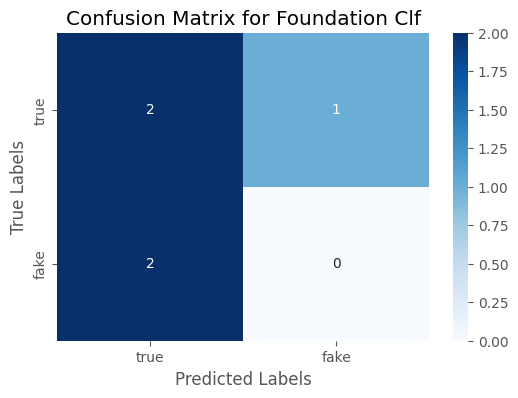

In [ ]:
get_conf_matrix(news_test["label"][:n].to_list(), inference_clf_foundation, "Foundation Clf")

In [ ]:
news_test["label"][:n].to_list()

['fake', 'true', 'fake', 'true', 'true']

In [ ]:
accuracy_score?

In [ ]:
accuracy_foundation = round(accuracy_score(y_true=news_test["label"][:n].to_list(), y_pred=inference_clf_foundation), 4)
accuracy_foundation

0.4

In [ ]:
df.loc[("Classification", "Foundation"), "Metric"] = f"Accuracy: {accuracy_foundation}"

In [ ]:

from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

#### Foundation ZSL

In [ ]:
# Definir el pipeline de clasificación zero-shot
bert_classifier_zero_shot = pipeline(
    task="zero-shot-classification",
    model=bert,
    model_kwargs={"cache_dir": cache_dir}
)


df.loc[("Classification", "Foundation ZSL"), "Size in (GB)"]  = get_size_gb(bert_classifier_zero_shot)
df.loc[("Classification", "Foundation ZSL"), "Qty of Parameters"] = get_n_parameters(bert_classifier_zero_shot)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


In [ ]:
start_time = time.time()  # Registrar tiempo de comienzo

# Etiquetas a probar
candidate_labels = ["true", "fake"]

# Clasificación
inference_clf_zero_shot = bert_classifier_zero_shot(news_test['text'][:n].to_list(), candidate_labels)

# Mostrar resultados
inference_clf_zero_shot

end_time = time.time()  # Registrar tiempo de finalización

inference_time_clf_zero_shot = round(end_time - start_time, 4) # Calcular el tiempo de inferencia

df.loc[("Classification", "Foundation ZSL"), "Inference Time"] = inference_time_clf_zero_shot

In [ ]:
inference_clf_zsl  = []
for inference in inference_clf_zero_shot:
  index = np.argmax(inference["scores"])
  output = inference["labels"][index]
  inference_clf_zsl.append(output)

In [ ]:
inference_clf_zsl

['true', 'fake', 'true', 'fake', 'true']

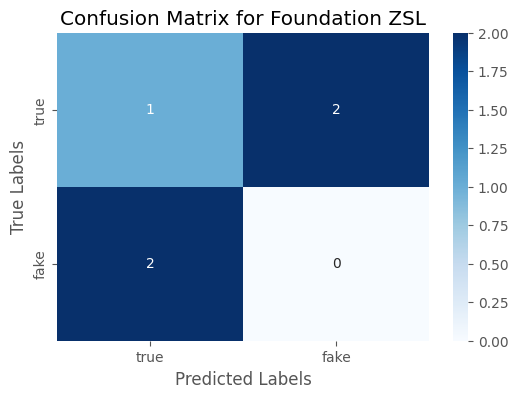

In [ ]:
get_conf_matrix(news_test["label"][:n].to_list(), inference_clf_zsl, "Foundation ZSL")

In [ ]:
accuracy_foundation_zsl = round(accuracy_score(y_true=news_test["label"][:n].to_list(), y_pred=inference_clf_zsl), 4)
accuracy_foundation_zsl

0.2

In [ ]:
df.loc[("Classification", "Foundation ZSL"), "Metric"] = f"Accuracy:{accuracy_foundation_zsl}"

#### Foundation FSL

In [ ]:
bert_text_generation_fsl = pipeline(
    task="text2text-generation",  # Tarea específica para modelos Seq2Seq como BERT2BERT
    model=bert,
    model_kwargs={"cache_dir": cache_dir},
    generation_kwargs={
        "max_new_tokens": 10,  # Tokens generados por el modelo
        "min_length": 5,      # Longitud mínima del texto generado
    }
)

df.loc[("Classification", "Foundation FSL"), "Size in (GB)"]  = get_size_gb(bert_text_generation_fsl)
df.loc[("Classification", "Foundation FSL"), "Qty of Parameters"] = get_n_parameters(bert_text_generation_fsl)

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of the model checkpoint at google-bert/bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.w

In [ ]:
start_time = time.time()  # Registrar tiempo de comienzo

# Supongamos que tenemos los artículos y resúmenes iniciales
news_test_1_3 = news_test["text"][:3].to_list()
shots_1_3 = news_test["label"][:3].to_list()

# Crear el prompt inicial con los primeros tres ejemplos
prompt = f"""For each news article, classify:
[Article 1]: "{news_test_1_3[0]}"
[Classification 1]: "{shots_1_3[0]}"
###
[Article 2]: "{news_test_1_3[1]}"
[Classification 2]: "{shots_1_3[1]}"
###
[Article 3]: "{news_test_1_3[2]}"
[Classification 3]: "{shots_1_3[2]}"
###
"""

# Inicializar una lista para almacenar los resultados
results = []

# Procesar los artículos del índice 4 al 10
for i in range(3, 10):  # Solo hasta el índice 9 (10 artículos)
    # Construir el prompt extendido para el artículo actual
    prompt += f"""
[Article {i+1}]: "{news_test['text'][i]}"
[Classification {i+1}]:"""

    # Llamar al modelo para generar la clasificación
    result = foundation_summa_zsl(prompt)  # Reemplaza foundation_summa_zsl con tu función de modelo

    # Almacenar los resultados
    results.append({
        "article": news_test["text"][i],
        "classification": result[0]["generated_text"]  # Ajusta según el formato del output del modelo
    })

end_time = time.time()  # Registrar tiempo de finalización

inference_time_clf_fsl = round(end_time - start_time, 4) # Calcular el tiempo de inferencia


In [ ]:
inference_clf_fsl = []
for result in results:
    inference_clf_fsl.append(result["classification"])

df.loc[("Classification", "Foundation FSL"), "Inference Time"] = inference_time_clf_fsl

In [ ]:
inference_clf_fsl

['a lot of fun with it.\'" Hudson said. "I\'m not sure if it\'s true, but I think it\'s true." Hudson said she was "not sure if it\'s true." Hudson said she was "not sure if it\'s true." Hudson said she was "not sure if it\'s true." Hudson said she was "not sure if it\'s true." Hudson said she was "not sure if',
 'a lot of fun with it.\'" Hudson said. "I\'m not sure if it\'s true, but I think it\'s true." Hudson said she was "not sure if it\'s true." Hudson said she was "not sure if it\'s true." Hudson said she was "not sure if it\'s true." Hudson said she was "not sure if it\'s true." Hudson said she was "not sure if',
 'a lot of fun with it.\'" Hudson said. "I\'m not sure if it\'s true, but I think it\'s true." Hudson said she was "not sure if it\'s true." Hudson said she was "not sure if it\'s true." Hudson said she was "not sure if it\'s true." Hudson said she was "not sure if it\'s true." Hudson said she was "not sure if',
 'a lot of fun with it.\'" Hudson said. "I\'m not sure if 

In [ ]:
df.loc[("Classification", "Foundation FSL"), "Metric"] = f"Accuracy:{0}" #  Zero por default, Nisiquiera clasifica una etiqueta.

#### Fine-tuned



In [ ]:
from transformers import AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
bert_num_labels = 2  # Clasificación binaria
bert_tokenizer = AutoTokenizer.from_pretrained(bert)
bert_model = AutoModelForSequenceClassification.from_pretrained(bert, num_labels=bert_num_labels)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Mapear etiquetas de texto a valores numéricos
label_mapping_bert = {"fake": 0, "true": 1}

news_train["label"] = news_train["label"].map(label_mapping_bert)
news_test["label"] = news_test["label"].map(label_mapping_bert)

In [ ]:
# Preprocesar datos
def bert_preprocess_function(examples):
    return bert_tokenizer(examples["text"], padding="max_length", truncation=True, max_length=2048)

In [ ]:
# Convertir a formato Dataset
bert_train_dataset = Dataset.from_pandas(news_train)
bert_test_dataset = Dataset.from_pandas(news_test)

In [ ]:
bert_train_dataset = bert_train_dataset.map(bert_preprocess_function, batched=True)
bert_test_dataset = bert_test_dataset.map(bert_preprocess_function, batched=True)

Map:   0%|          | 0/4487 [00:00<?, ? examples/s]

Map:   0%|          | 0/499 [00:00<?, ? examples/s]

In [ ]:
# Definir métricas de evaluación
def bert_compute_metrics(eval_pred):
    bert_logits, bert_labels = eval_pred
    bert_predictions = np.argmax(bert_logits, axis=1)
    bert_acc = accuracy_score(bert_labels, bert_predictions)
    bert_precision, bert_recall, bert_f1, _ = precision_recall_fscore_support(bert_labels, bert_predictions, average="binary")
    return {"accuracy": bert_acc, "precision": bert_precision, "recall": bert_recall, "f1": bert_f1}

In [ ]:
# Configurar hiperparámetros de entrenamiento
bert_training_args = TrainingArguments(
    output_dir="./bert_results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./bert_logs",
    logging_steps=100,
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

# Inicializar Trainer
bert_trainer = Trainer(
    model=bert_model,
    args=bert_training_args,
    train_dataset=bert_train_dataset,
    eval_dataset=bert_test_dataset,
    tokenizer=bert_tokenizer,
    compute_metrics=bert_compute_metrics
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-120-54804bd03777>:18: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  bert_trainer = Trainer(


In [ ]:
# Entrenamiento
bert_trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.544200,0.528146,0.745491,0.765625,0.824916,0.794165
2,0.376600,0.573380,0.745491,0.763975,0.828283,0.794830
3,0.212500,0.658606,0.741483,0.769231,0.808081,0.788177


TrainOutput(global_step=843, training_loss=0.4001205066486327, metrics={'train_runtime': 88.1978, 'train_samples_per_second': 152.623, 'train_steps_per_second': 9.558, 'total_flos': 885434479050240.0, 'train_loss': 0.4001205066486327, 'epoch': 3.0})

In [ ]:

# Guardar modelo y tokenizador fine-tuned
bert_model.save_pretrained("./bert_fine_tuned_fake_news")
bert_tokenizer.save_pretrained("./bert_fine_tuned_fake_news")

('./bert_fine_tuned_fake_news/tokenizer_config.json',
 './bert_fine_tuned_fake_news/special_tokens_map.json',
 './bert_fine_tuned_fake_news/vocab.txt',
 './bert_fine_tuned_fake_news/added_tokens.json',
 './bert_fine_tuned_fake_news/tokenizer.json')

In [ ]:
start_time = time.time()  # Registrar tiempo de comienzo

# Cargar modelo y tokenizador fine-tuned
bert_model = AutoModelForSequenceClassification.from_pretrained("./bert_fine_tuned_fake_news")

# Asegurarte de que el modelo esté en la GPU
bert_model = bert_model.to("cuda")

# Tokenizar los textos de news_test
inputs = bert_tokenizer(
    news_test["text"].tolist(),
    return_tensors="pt",
    padding=True,
    truncation=True,  # Trunca si excede el límite del modelo (512 para BERT)
    max_length=512  # Máximo soportado por BERT
)

# Mover los tensores de entrada a la GPU
inputs = {key: tensor.to("cuda") for key, tensor in inputs.items()}

# Realizar inferencia en la GPU
with torch.no_grad():
    outputs = bert_model(**inputs)
    logits = outputs.logits

# Obtener las predicciones (índice del valor máximo por fila)
predictions = torch.argmax(logits, dim=1)

# Mapear las predicciones a etiquetas (fake o true)
id2label = {0: "fake", 1: "true"}
predicted_labels = [id2label[pred.item()] for pred in predictions]

# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    "text": news_test["text"],
    "true_label": news_test["label"],  # Etiqueta real
    "predicted_label": predicted_labels
})

end_time = time.time()  # Registrar tiempo de finalización

inference_time_bert_fine_tuned = round(end_time - start_time, 4) # Calcular el tiempo de inferencia

In [ ]:
results_df

,text,true_label,predicted_label
0,Reports of Lawrence and Pitt dating spread in ...,fake,fake
1,Eminem’s moderately anticipated ninth album no...,true,true
2,It’s that time of the year when you should hav...,fake,true
3,Super Bowl XLI was an American football game p...,true,true
4,Erika Jayne may not have won the coveted Mirro...,true,true
...,...,...,...
494,Prince George and Princess Charlotte were stri...,true,true
495,The Fifty Shades Darker press tour will begin ...,fake,fake
496,Sign up for our daily newsletter HERE!,true,true
497,Brian Kline is the type of person who voted fo...,fake,fake


In [ ]:
accuracy_fine_tuned = round(accuracy_score(y_true=news_test["label"].to_list(), y_pred=predicted_labels), 4)
accuracy_fine_tuned

0.5952

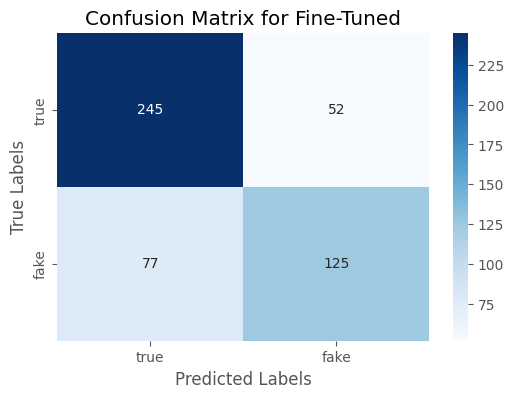

In [ ]:
#  Matriz de confusión
get_conf_matrix(news_test["label"].to_list(), predicted_labels, "Fine-Tuned")

In [ ]:
bert_fine_tuned_n_parameters = sum(p.numel() for p in bert_model.parameters())


108311810

In [ ]:
bert_fine_tuned_size = sum([p.numel() * p.element_size() for p in bert_model.parameters()])

In [ ]:
df.loc[("Classification", "Fine-Tuned"), "Size in (GB)"]  = bert_fine_tuned_size
df.loc[("Classification", "Fine-Tuned"), "Qty of Parameters"] = bert_fine_tuned_n_parameters
df.loc[("Classification", "Fine-Tuned"), "Inference Time"] = inference_time_bert_fine_tuned
df.loc[("Classification", "Fine-Tuned"), "Metric"] = f"Accuracy: {accuracy_fine_tuned}"

#### HuggingFace's M1

https://huggingface.co/jy46604790/Fake-News-Bert-Detect

Según el Propietario del modelo, LABEL_0 = FakeNews,  LABEL_1 = RealNews

In [ ]:
# Definir el pipeline de clasificación
hugfc_class1 = pipeline(
    task="text-classification",  # Generación  de  Texto
    model="jy46604790/Fake-News-Bert-Detect",
    tokenizer="jy46604790/Fake-News-Bert-Detect",
    truncation=True,
    padding=True,
    model_kwargs={"cache_dir": cache_dir}
)

df.loc[("Classification", "Hugginface's M1"), "Size in (GB)"]  = get_size_gb(hugfc_class1)
df.loc[("Classification", "Hugginface's M1"), "Qty of Parameters"] = get_n_parameters(hugfc_class1)
df.loc[("Classification", "Hugginface's M1"), "Inference Time"] = get_inference_time(hugfc_class1, news_train["text"][:n].to_list(), n)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
inference_hugfc1 = hugfc_class1([news.replace('"',  "'") for news in news_test["text"][:n]])

label_map_hgfc1 = {"LABEL_0": "fake", "LABEL_1": "true"} #  Creando un mapa para que cada label equivalga a algo insightful

inference_hugfc1_ = [label_map_hgfc1[result["label"]] for result in inference_hugfc1]

inference_hugfc1_

['fake', 'fake', 'fake', 'true', 'fake']

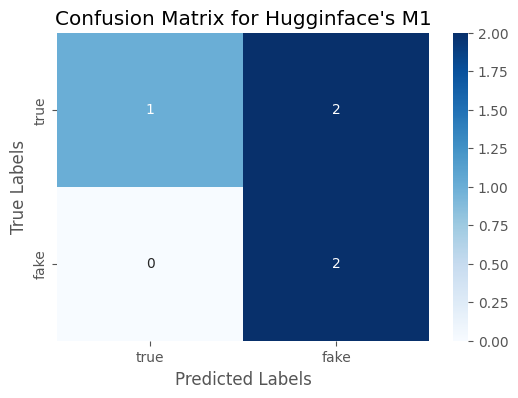

In [ ]:
get_conf_matrix(news_test["label"][:n].to_list(), inference_hugfc1_, "Hugginface's M1")

In [ ]:
accuracy_hugfc1 = round(accuracy_score(y_true=news_test["label"][:n].to_list(), y_pred=inference_hugfc1_), 4)
accuracy_hugfc1

0.6

In [ ]:
df.loc[("Classification", "Hugginface's M1"), "Metric"] = f"Accuracy: {accuracy_hugfc1}"


#### HuggingFace's M2

https://huggingface.co/Pavan48/fake_news_detection_roberta

In [ ]:
hugfc_class2 = pipeline(
    task="text-classification",  # Generación  de  Texto
    model="Pavan48/fake_news_detection_roberta",
    tokenizer="Pavan48/fake_news_detection_roberta",
    truncation=True,
    padding=True,
    model_kwargs={"cache_dir": cache_dir}
)

df.loc[("Classification", "Hugginface's M2"), "Size in (GB)"]  = get_size_gb(hugfc_class2)
df.loc[("Classification", "Hugginface's M2"), "Qty of Parameters"] = get_n_parameters(hugfc_class2)
df.loc[("Classification", "Hugginface's M2"), "Inference Time"] = get_inference_time(hugfc_class2, news_train["text"][:n].to_list(), n)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
inference_hugfc2 = hugfc_class2([news.replace('"',  "'") for news in news_test["text"][:n]])

In [ ]:
inference_hugfc2_ = [label_map_hgfc1[result["label"]] for result in inference_hugfc2]
inference_hugfc2_

['true', 'true', 'true', 'true', 'true']

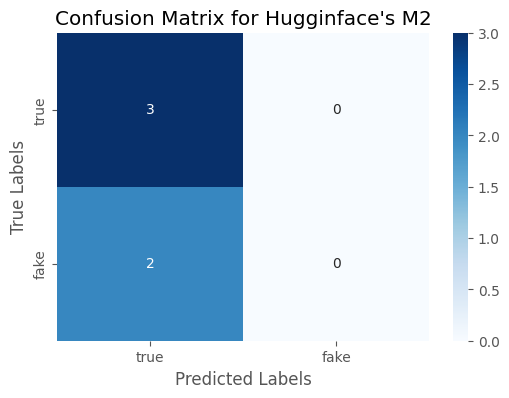

In [ ]:
get_conf_matrix(news_test["label"][:n].to_list(), inference_hugfc2_, "Hugginface's M2")

In [ ]:
accuracy_hugfc2 = round(accuracy_score(y_true=news_test["label"][:n].to_list(), y_pred=inference_hugfc2_), 4)
accuracy_hugfc2

0.6

In [ ]:
df.loc[("Classification", "Hugginface's M2"), "Metric"] = f"Accuracy: {accuracy_hugfc2}"

In [ ]:
benchmark = df

measureables = list(benchmark.columns)[:-1]

measureables

['Metric', 'Inference Time', 'Size in (GB)', 'Qty of Parameters']

In [ ]:
benchmark.loc[
    ("Summarization", "Foundation"),
    "Qualitative Insight"] = """"""


benchmark.loc[
    ("Summarization", "Foundation ZSL"),
    "Qualitative Insight"] = """"""

benchmark.loc[
    ("Summarization", "Foundation FSL"),
    "Qualitative Insight"] = """"""

benchmark.loc[
    ("Summarization", "Fine-Tuned"),
    "Qualitative Insight"] = """"""


benchmark.loc[
    ("Summarization", "Hugginface's M1"),
    "Qualitative Insight"] = """"""

benchmark.loc[
    ("Summarization", "Hugginface's M2"),
    "Qualitative Insight"] = """"""

#### --------------------------------------------------------------------

benchmark.loc[
    ("Classification", "Foundation"),
    "Qualitative Insight"] = """"""


benchmark.loc[
    ("Classification", "Foundation ZSL"),
    "Qualitative Insight"] = """"""

benchmark.loc[
    ("Classification", "Foundation FSL"),
    "Qualitative Insight"] = """"""

benchmark.loc[
    ("Classification", "Fine-Tuned"),
    "Qualitative Insight"] = """"""

benchmark.loc[
    ("Classification", "Hugginface's M1"),
    "Qualitative Insight"] = """"""

benchmark.loc[
    ("Classification", "Hugginface's M2"),
    "Qualitative Insight"] = """"""





In [ ]:
benchmark

Metric Inference Time  \
Task           Model Type                                                      
Summarization  Foundation                   Avg Rouge: 0.1426         8.8162   
               Foundation ZSL               Avg Rouge: 0.1073          8.892   
               Foundation FSL               Avg Rouge: 0.1152         8.7974   
               Fine-Tuned       Avg Rouge: 0.1453157838088816       139.2467   
               Hugginface's M1              Avg Rouge: 0.2157        16.9589   
               Hugginface's M2              Avg Rouge: 0.2003        17.1048   
Classification Foundation                       Accuracy: 0.4         0.7692   
               Foundation ZSL                    Accuracy:0.2         1.5026   
               Foundation FSL                      Accuracy:0        12.5455   
               Fine-Tuned                    Accuracy: 0.5952         4.5987   
               Hugginface's M1                  Accuracy: 0.6         1.2603   
               Hugginface's M2                  Accuracy: 0.6         1.0884   

                               Size in (GB) Qty of Parameters  \
Task           Model Type                                       
Summarization  Foundation            0.2867          76961152   
               Foundation ZSL        0.2867          76961152   
               Foundation FSL        0.2867          76961152   
               Fine-Tuned          0.286703          76961152   
               Hugginface's M1       0.6029         161844480   
               Hugginface's M2       0.6029         161844480   
Classification Foundation            0.4035         108311810   
               Foundation ZSL        0.4035         108311810   
               Foundation FSL        0.4036         108340804   
               Fine-Tuned         433247240         108311810   
               Hugginface's M1       0.4643         124647170   
               Hugginface's M2       0.4643         124647170   

                               Qualitative Insight  
Task           Model Type                           
Summarization  Foundation                           
               Foundation ZSL                       
               Foundation FSL                       
               Fine-Tuned                           
               Hugginface's M1                      
               Hugginface's M2                      
Classification Foundation                           
               Foundation ZSL                       
               Foundation FSL                       
               Fine-Tuned                           
               Hugginface's M1                      
               Hugginface's M2

In [ ]:
benchmark.copy().loc["Summarization"]["Metric"].apply(lambda x: x.split(":")[1]).astype(float),
benchmark.copy().loc["Summarization"].index.to_list()

['Foundation',
 'Foundation ZSL',
 'Foundation FSL',
 'Fine-Tuned',
 "Hugginface's M1",
 "Hugginface's M2"]

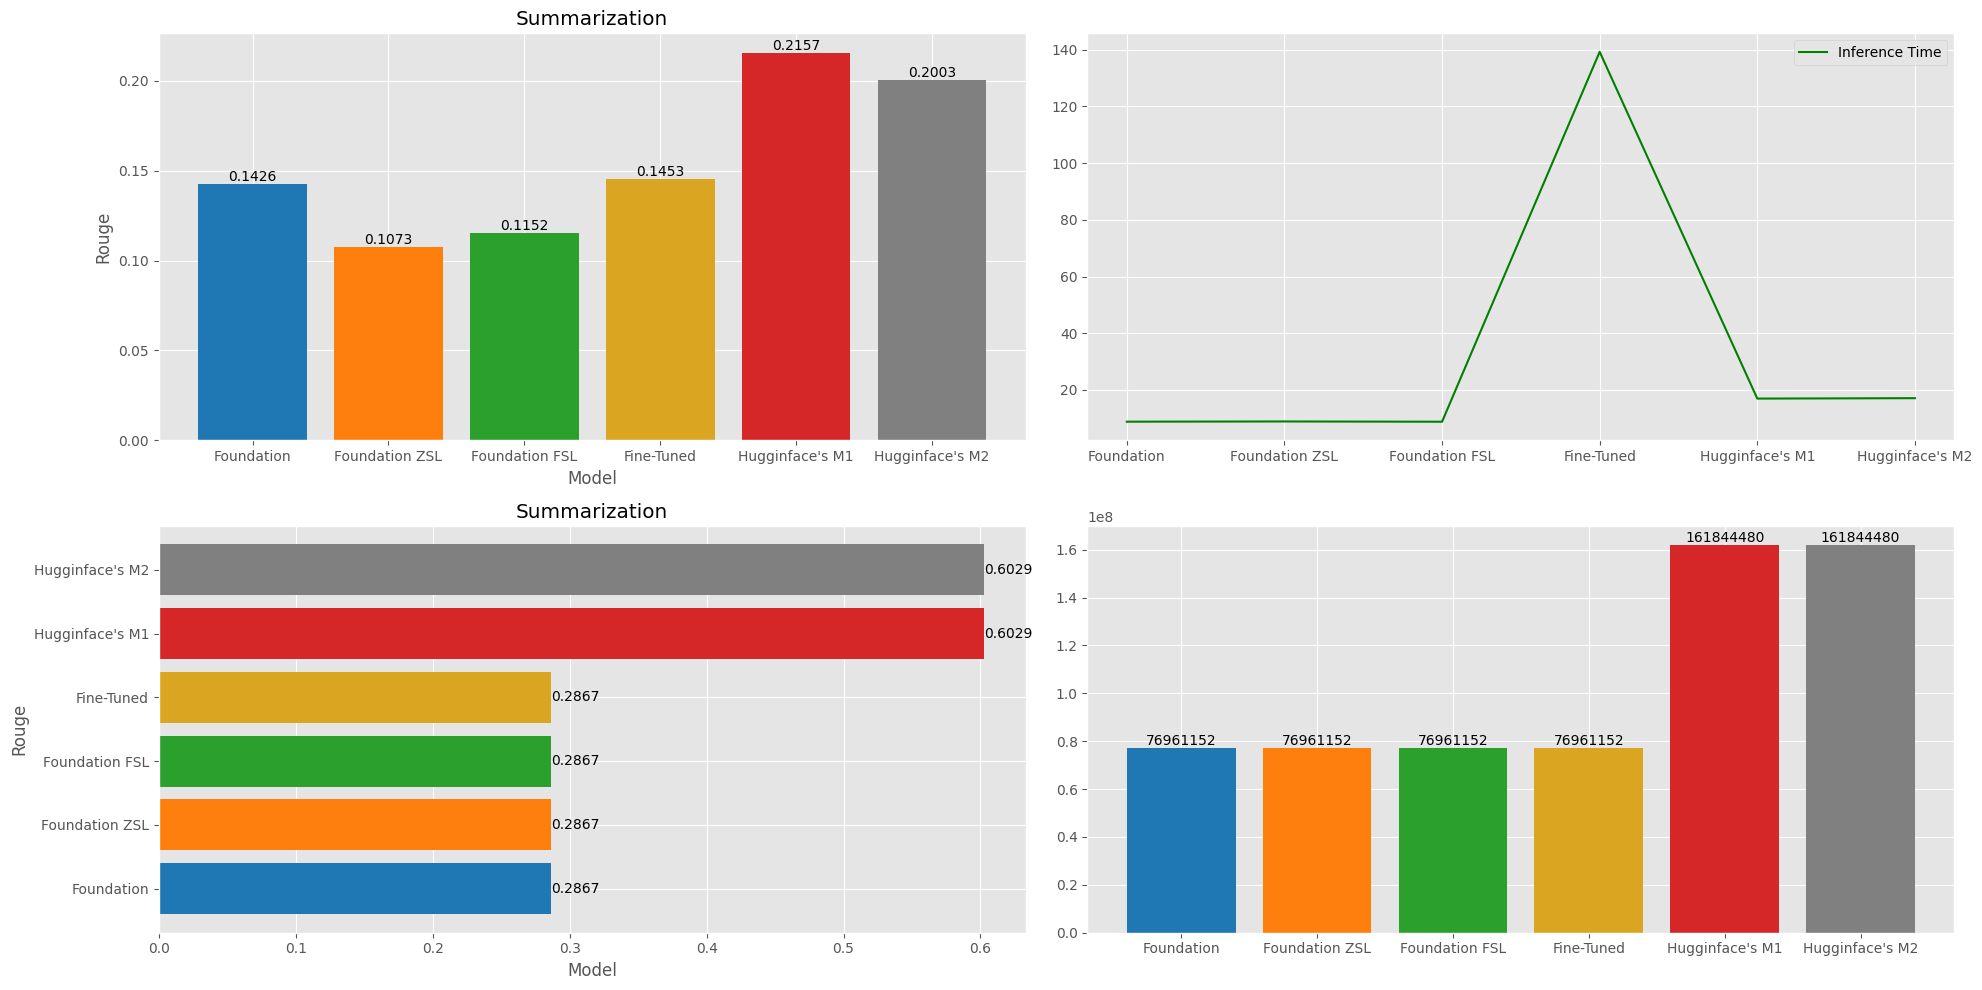

In [ ]:
# Summarization
fig, axes = plt.subplots(len(measureables)//2, figsize=(20, 10), ncols=len(measureables)//2)

color = ["#1f77b4", "#ff7f0e", "#2ca02c", "goldenrod" , "#d62728", "gray"]


# ----------------------------------- PRIMERR GRÁFICO ----------------------------------- #
bar_ax1 = axes[0, 0].bar(
    benchmark.copy().loc["Summarization"].index.to_list(),
    benchmark.copy().loc["Summarization"]["Metric"].apply(lambda x: x.split(":")[1]).astype(float),
    color = color
)

for bar in bar_ax1:
    yval = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

axes[0, 0].set(
    title="Summarization",
    ylabel="Rouge",
    xlabel="Model"
)


# ----------------------------------- SEGUNDO GRÁFICO ----------------------------------- #

bar_ax2 = axes[0, 1].plot(
    benchmark.copy().loc["Summarization"].index.to_list(),
    benchmark.copy().loc["Summarization"]["Inference Time"],
    color = "green"
)


axes[0, 1].legend(["Inference Time"])


# ----------------------------------- TERCER GRÁFICO ----------------------------------- #
bar_ax3 =  axes[1, 0].barh(
    benchmark.copy().loc["Summarization"].index.to_list(),
    benchmark.copy().loc["Summarization"]["Size in (GB)"],
    color = color
)

for bar in bar_ax3:
    yval = bar.get_width()
    axes[1, 0].text(yval, bar.get_y() + bar.get_height()/2, round(yval, 4), va='center')

axes[1, 0].set(
    title="Summarization",
    ylabel="Rouge",
    xlabel="Model"
)

# ----------------------------------- CUARTO GRÁFICO ----------------------------------- #

bar_ax4 = axes[1, 1].bar(
    benchmark.copy().loc["Summarization"].index.to_list(),
    benchmark.copy().loc["Summarization"]["Qty of Parameters"],
    color = color
)


for bar in bar_ax4:
    yval = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

axes


plt.tight_layout()

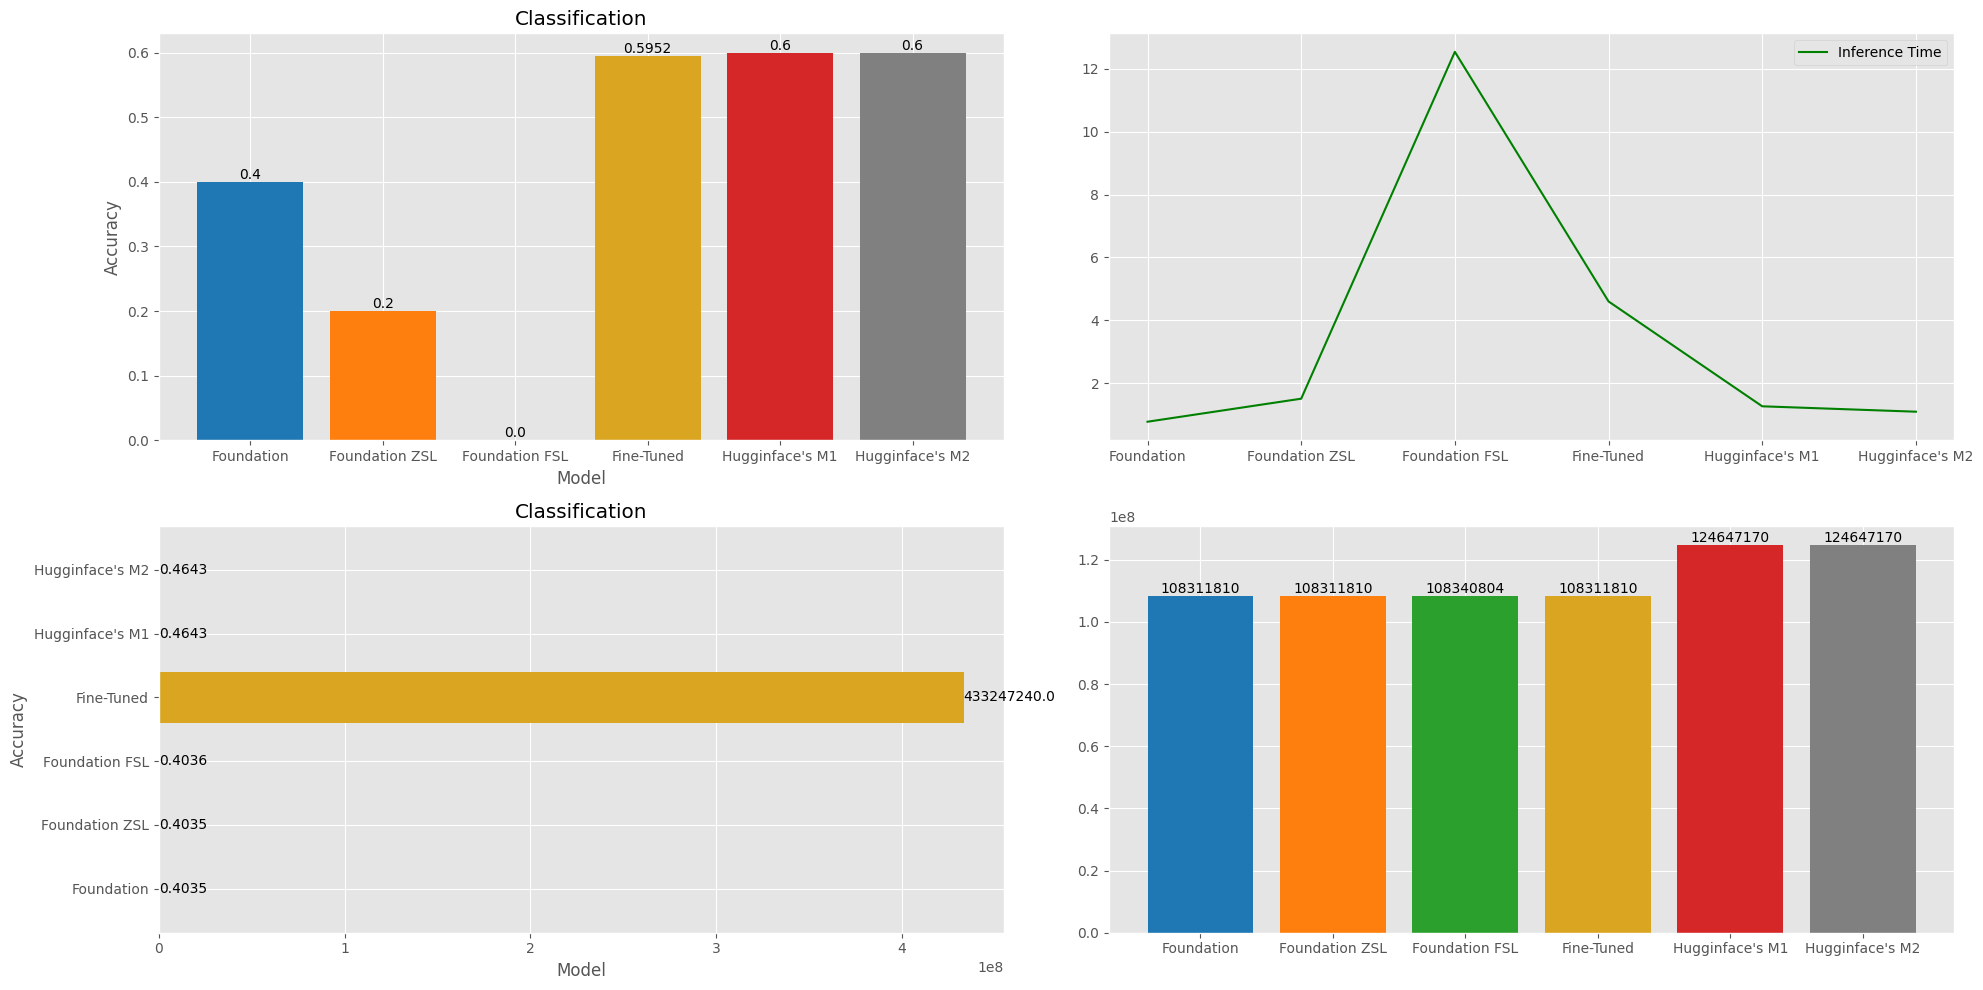

In [ ]:
# Classification
fig, axes = plt.subplots(len(measureables)//2, figsize=(20, 10), ncols=len(measureables)//2)

color = ["#1f77b4", "#ff7f0e", "#2ca02c", "goldenrod" , "#d62728", "gray"]


# ----------------------------------- PRIMERR GRÁFICO ----------------------------------- #
bar_ax1 = axes[0, 0].bar(
    benchmark.copy().loc["Classification"].index.to_list(),
    benchmark.copy().loc["Classification"]["Metric"].apply(lambda x: x.split(":")[1]).astype(float),
    color = color
)

for bar in bar_ax1:
    yval = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

axes[0, 0].set(
    title="Classification",
    ylabel="Accuracy",
    xlabel="Model"
)


# ----------------------------------- SEGUNDO GRÁFICO ----------------------------------- #

bar_ax2 = axes[0, 1].plot(
    benchmark.copy().loc["Classification"].index.to_list(),
    benchmark.copy().loc["Classification"]["Inference Time"],
    color = "green"
)


axes[0, 1].legend(["Inference Time"])


# ----------------------------------- TERCER GRÁFICO ----------------------------------- #
bar_ax3 =  axes[1, 0].barh(
    benchmark.copy().loc["Classification"].index.to_list(),
    benchmark.copy().loc["Classification"]["Size in (GB)"],
    color = color
)

for bar in bar_ax3:
    yval = bar.get_width()
    axes[1, 0].text(yval, bar.get_y() + bar.get_height()/2, round(yval, 4), va='center')

axes[1, 0].set(
    title="Classification",
    ylabel="Accuracy",
    xlabel="Model"
)

# ----------------------------------- CUARTO GRÁFICO ----------------------------------- #

bar_ax4 = axes[1, 1].bar(
    benchmark.copy().loc["Classification"].index.to_list(),
    benchmark.copy().loc["Classification"]["Qty of Parameters"],
    color = color
)


for bar in bar_ax4:
    yval = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

axes


plt.tight_layout()